## Cancer Classifier POC

## <span style="color:red">I Data import & cleaning</span>

In [309]:
import pyforest
#df.style.set_properties(subset=['comment'], **{'width': '600px'})
#lazy_imports()

In [402]:
df = pd.read_excel("AmarNLP.xlsx", header=2, usecols=['specNum', 'final', 'interpretation'])

<IPython.core.display.Javascript object>

In [403]:
df.head()

,specNum,final,interpretation
0,S18-33164,"Esophagus, random biopsy -- 1. No diagnos...",Negative
1,N18-1798,"Urine, Collection Method Not Specified: ...",Positive
2,S18-32678,"Uterus, cervix, bilateral fallopian tubes, hys...",Negative
3,N18-1801,"Cerebrospinal Fluid, Tube 4: NEGATIVE FO...",Negative
4,C18-22912,Specimen AdequacySatisfactory for evaluation. ...,Negative


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   specNum         1848 non-null   object
 1   final           1848 non-null   object
 2   interpretation  1848 non-null   object
dtypes: object(3)
memory usage: 43.4+ KB


In [404]:
#Per dicussion with Amar, the records starting with C should be elimnated. 

df = df[~df['specNum'].str.startswith('C')]

In [405]:
df[df['specNum'].str.startswith('C')]

,specNum,final,interpretation


In [406]:
#Per discussion with Amar, the final should be all lower case
#lowerfinal = df.loc[, 'final'].str.lower()
#df['final'] = lowerfinal
df.loc[:, 'final'] = df['final'].str.lower()

In [407]:
df.reset_index(drop=True, inplace = True )

In [408]:
df.drop_duplicates(keep='first',inplace=True)

In [409]:
result_map = {'Negative': 0, 
            'Positive': 1,
            'Intermediate': 2} 
df['result']=df['interpretation'].map(result_map)

In [433]:
df.style.set_properties(subset=['final'], **{'width': '1000px'})
#lazy_imports()

,specNum,final,interpretation,result
0,S18-33164,esophagus random biopsy no diagnostic abnormality no eosinophils identified,Negative,0
1,N18-1798,urine collection method not specified negative for high grade urothelial carcinoma negative,Positive,1
2,S18-32678,uterus cervix bilateral fallopian tubes hysterectomy and bilateral salpingectomy cervix with no evidence of neoplasia endometrial polyp leiomyomata up to including cellular leiomyoma and areas of hyalinization and necrosis proliferative endometrium negative for hyperplasia atypia or malignancy,Negative,0
3,N18-1801,cerebrospinal fluid tube negative for malignancy,Negative,0
4,S18-33316,colon descending biopsy no diagnostic abnormality colon ascending polypectomy tubulovillous adenoma,Negative,0
5,S18-33792,skin neck excision epidermal inclusion cyst skin back excision epidermal inclusion cyst ruptured and inflamed,Negative,0
6,S18-33402,colon transverse ascending and sigmoid polypectomies tubular adenomas,Negative,0
7,S18-33927,colon descending polypectomy tubular adenoma rectum polypectomy hyperplastic polyp,Negative,0
8,S18-33061,right breast tissue oncoplastic breast reduction benign breast tissue left breast tissue oncoplastic breast reduction benign breast tissue,Negative,0
9,S18-33582,liver left needle core biopsy nonspecific minimal bile duct injury see comment,Negative,0


In [411]:
df1 = df.copy()

In [412]:
df1

,specNum,final,interpretation,result
0,S18-33164,"esophagus, random biopsy -- 1. no diagnos...",Negative,0
1,N18-1798,"urine, collection method not specified: ...",Positive,1
2,S18-32678,"uterus, cervix, bilateral fallopian tubes, hys...",Negative,0
3,N18-1801,"cerebrospinal fluid, tube 4: negative fo...",Negative,0
4,S18-33316,"a. colon, descending, biopsy -- no diagnostic ...",Negative,0
...,...,...,...,...
1182,S18-33401,"colon, polyp, rectum, polypectomy -- polypoid ...",Intermediate,2
1183,F18-1364,"salivary gland, parotid, left, ultrasound guid...",Negative,0
1184,S18-33581,"gallbladder, cholecystectomy -- chronic cholec...",Negative,0
1185,S18-33163,"a. stomach, site not otherwise specified, biop...",Intermediate,2


## Data Cleaning

In [413]:
#Per Amar, doing the following data cleaning: 
import re
text = 'A&B. Bladder, left wall, superficial and deep, TUR --      1. High grade papillary urothelial carcinoma      2. Lamina propria and muscularis propria invasion present'
text = text.lower()
text

'a&b. bladder, left wall, superficial and deep, tur --      1. high grade papillary urothelial carcinoma      2. lamina propria and muscularis propria invasion present'

In [414]:
# 1) remove numbers + 2letter unit
#re.findall(r'\d+ *[a-z]{2}', text)
text = re.sub(r'\d+ *[a-z]{2}', ' ', text)
text

'a&b. bladder, left wall, superficial and deep, tur --      1. high grade papillary urothelial carcinoma      2. lamina propria and muscularis propria invasion present'

In [415]:
# 2) remove all punctuations and numbers
re.findall(r'[^\w\s]', text)
#re.sub(r'\s+', ' ', text)
text = re.sub(r'[^\w\s]', ' ', text)
text

'a b  bladder  left wall  superficial and deep  tur         1  high grade papillary urothelial carcinoma      2  lamina propria and muscularis propria invasion present'

In [416]:
# 3)remove numbers
#re.findall(r'\d+', text)
text = re.sub(r'\d+', ' ', text)

In [417]:
text

'a b  bladder  left wall  superficial and deep  tur            high grade papillary urothelial carcinoma         lamina propria and muscularis propria invasion present'

In [418]:
# 4) remove single letters
#re.findall(r'(^[a-z] +| +[a-z] +| +$[a-z])', text)
#text =  re.sub(r'(^[a-z] +|^[a-z] [a-z] | +[a-z] +| +$[a-z]| [a-z] $[a-z])', ' ', text)
#text =  re.sub(r'(^[a-z] +|^[a-z] [a-z] +| +[a-z] +| +[a-z] [a-z] +| +$[a-z]| +[a-z] $[a-z])', ' ', text)
text =  re.sub(r'(\\b[a-z] \\b|\\b [a-z]\\b)', ' ', text)

text

'a b  bladder  left wall  superficial and deep  tur            high grade papillary urothelial carcinoma         lamina propria and muscularis propria invasion present'

In [419]:
# 5)remove extra space
text = re.sub(r' +', ' ', text)

In [420]:
# 6) strip space both ends
re.findall(r'(^ |$ )', text)
text = re.sub(r'(^ |$ )', '', text)

In [421]:
text.strip()

'a b bladder left wall superficial and deep tur high grade papillary urothelial carcinoma lamina propria and muscularis propria invasion present'

In [422]:
#data cleaning on data frame
# 1) remove numbers + 2letter unit
#re.findall(r'\d+ *[a-z]{2}', text)
#text = re.sub(r'\d+ *[a-z]{2}', ' ', text)
df1['final'] = df1['final'].str.replace(r'\d+ *[a-z]{2}', ' ')
df1

<ipython-input-422-dbecb3929ac4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['final'] = df1['final'].str.replace(r'\d+ *[a-z]{2}', ' ')


,specNum,final,interpretation,result
0,S18-33164,"esophagus, random biopsy -- 1. no diagnos...",Negative,0
1,N18-1798,"urine, collection method not specified: ...",Positive,1
2,S18-32678,"uterus, cervix, bilateral fallopian tubes, hys...",Negative,0
3,N18-1801,"cerebrospinal fluid, tube 4: negative fo...",Negative,0
4,S18-33316,"a. colon, descending, biopsy -- no diagnostic ...",Negative,0
...,...,...,...,...
1182,S18-33401,"colon, polyp, rectum, polypectomy -- polypoid ...",Intermediate,2
1183,F18-1364,"salivary gland, parotid, left, ultrasound guid...",Negative,0
1184,S18-33581,"gallbladder, cholecystectomy -- chronic cholec...",Negative,0
1185,S18-33163,"a. stomach, site not otherwise specified, biop...",Intermediate,2


In [423]:
# 2) remove all punctuations and numbers
#re.findall(r'[^\w\s]', text)
#re.sub(r'\s+', ' ', text)
#text = re.sub(r'[^\w\s]', ' ', text)
df1['final'] = df1['final'].str.replace(r'[^\w\s]', ' ')
df1

<ipython-input-423-6524d8c3205d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['final'] = df1['final'].str.replace(r'[^\w\s]', ' ')


,specNum,final,interpretation,result
0,S18-33164,esophagus random biopsy 1 no diagnos...,Negative,0
1,N18-1798,urine collection method not specified ...,Positive,1
2,S18-32678,uterus cervix bilateral fallopian tubes hys...,Negative,0
3,N18-1801,cerebrospinal fluid tube 4 negative fo...,Negative,0
4,S18-33316,a colon descending biopsy no diagnostic ...,Negative,0
...,...,...,...,...
1182,S18-33401,colon polyp rectum polypectomy polypoid ...,Intermediate,2
1183,F18-1364,salivary gland parotid left ultrasound guid...,Negative,0
1184,S18-33581,gallbladder cholecystectomy chronic cholec...,Negative,0
1185,S18-33163,a stomach site not otherwise specified biop...,Intermediate,2


In [424]:
# 3)remove numbers
#re.findall(r'\d+', text)
#text = re.sub(r'\d+', ' ', text)
df1['final'] = df1['final'].str.replace(r'\d+', ' ')
df1

<ipython-input-424-49ab51a4aa02>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['final'] = df1['final'].str.replace(r'\d+', ' ')


,specNum,final,interpretation,result
0,S18-33164,esophagus random biopsy no diagnos...,Negative,0
1,N18-1798,urine collection method not specified ...,Positive,1
2,S18-32678,uterus cervix bilateral fallopian tubes hys...,Negative,0
3,N18-1801,cerebrospinal fluid tube negative fo...,Negative,0
4,S18-33316,a colon descending biopsy no diagnostic ...,Negative,0
...,...,...,...,...
1182,S18-33401,colon polyp rectum polypectomy polypoid ...,Intermediate,2
1183,F18-1364,salivary gland parotid left ultrasound guid...,Negative,0
1184,S18-33581,gallbladder cholecystectomy chronic cholec...,Negative,0
1185,S18-33163,a stomach site not otherwise specified biop...,Intermediate,2


In [425]:
# 4) remove single letters
#re.findall(r'(^[a-z] +| +[a-z] +| +$[a-z])', text)
#text =  re.sub(r'(^[a-z] +| +[a-z] +| +$[a-z])', ' ', text)
#df['final'] = df['final'].str.replace(r'(^[a-z] +| +[a-z] +| +$[a-z])', ' ')
#df1['final'] = df1['final'].str.replace(r'(^[a-z] +|^[a-z] [a-z] +| +[a-z] +| +[a-z] [a-z] +| +$[a-z]| +[a-z] +$[a-z])', ' ')
#df1.iloc[1166]

In [426]:
def remove_letter(input):
    return ' '.join([w for w in input.split() if len(w)>1])

In [427]:
df1['final'] = df1['final'].map(remove_letter)

In [428]:
df1.iloc[1166]

specNum                                                   S18-33887
final             bladder left wall superficial and deep tur hig...
interpretation                                             Positive
result                                                            1
Name: 1166, dtype: object

In [429]:
# 5)remove extra space
#text = re.sub(r' +', ' ', text)
df1['final'] = df1['final'].str.replace(r'\s+', ' ')
df1

<ipython-input-429-9cbf236ce26c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['final'] = df1['final'].str.replace(r'\s+', ' ')


,specNum,final,interpretation,result
0,S18-33164,esophagus random biopsy no diagnostic abnormal...,Negative,0
1,N18-1798,urine collection method not specified negative...,Positive,1
2,S18-32678,uterus cervix bilateral fallopian tubes hyster...,Negative,0
3,N18-1801,cerebrospinal fluid tube negative for malignancy,Negative,0
4,S18-33316,colon descending biopsy no diagnostic abnormal...,Negative,0
...,...,...,...,...
1182,S18-33401,colon polyp rectum polypectomy polypoid coloni...,Intermediate,2
1183,F18-1364,salivary gland parotid left ultrasound guided ...,Negative,0
1184,S18-33581,gallbladder cholecystectomy chronic cholecysti...,Negative,0
1185,S18-33163,stomach site not otherwise specified biopsy ch...,Intermediate,2


In [430]:
# 6) strip space both ends
#re.findall(r'(^ |$ )', text)
#text = re.sub(r'(^ |$ )', '', text)
df1['final'] = df1['final'].str.strip()
df1

,specNum,final,interpretation,result
0,S18-33164,esophagus random biopsy no diagnostic abnormal...,Negative,0
1,N18-1798,urine collection method not specified negative...,Positive,1
2,S18-32678,uterus cervix bilateral fallopian tubes hyster...,Negative,0
3,N18-1801,cerebrospinal fluid tube negative for malignancy,Negative,0
4,S18-33316,colon descending biopsy no diagnostic abnormal...,Negative,0
...,...,...,...,...
1182,S18-33401,colon polyp rectum polypectomy polypoid coloni...,Intermediate,2
1183,F18-1364,salivary gland parotid left ultrasound guided ...,Negative,0
1184,S18-33581,gallbladder cholecystectomy chronic cholecysti...,Negative,0
1185,S18-33163,stomach site not otherwise specified biopsy ch...,Intermediate,2


In [431]:
df = df1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

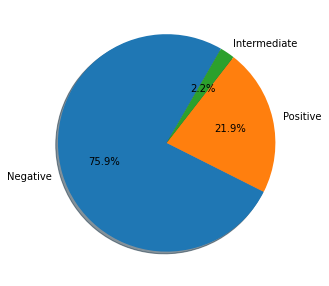

In [432]:
fig = plt.figure(figsize=(5, 5))
labels = 'Negative', 'Positive', 'Intermediate'
sizes = [len(df[df['result']==0]), len(df[df['result']==1]), len(df[df['result']==2])]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)
plt.show()

In [58]:
df.interpretation.value_counts()

Negative        901
Positive        260
Intermediate     26
Name: interpretation, dtype: int64